In [19]:
from feeds_and_speeds.calculator import (
    FeedsAndSpeedsCalculator,
    CutterMaterial,
    Machine,
    Router,
    Cutter,
)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from typing import List, Tuple
import copy

In [20]:
router = Router(input_voltage=120., input_current=6.5, efficiency=0.6, rated_speed=30000.)
machine = Machine(maximum_machine_force=18., router=router)

cutter = Cutter(
    material=CutterMaterial.carbide,
    diameter=0.25,
    length=0.75,
    flutes=3,
    shank_diameter=0.5,
    overall_stickout=1,
    maximum_deflection=0.0010)

# Create basic calculator, we can change anything we want later by making a copy
calculator = FeedsAndSpeedsCalculator(
        machine=machine,
        cutter=cutter,
        chipload=0.001,
        woc=0.1875,
        doc=0.0750,
        rpm=18000.0,
        k_factor=10.0,
        max_acceptable_deflection=0.0010,
    )

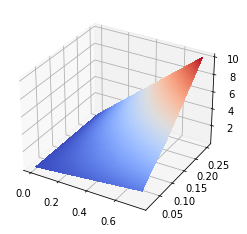

In [28]:
min_doc = 0.001 # min value > 0
max_doc = 3. * 0.25  # 300% cutter diameter
min_woc = 0.05 * 0.25 # 5% cutter diameter
max_woc = 0.25 # 100% cutter diameter
docs = np.linspace(min_doc, max_doc, 100)
wocs = np.linspace(min_woc, max_woc, 100)

combinations: List[Tuple[float, float]] = []
for doc in docs:
    for woc in wocs:
        combinations.append((doc, woc))


def calculator_with_doc_woc(
    calculator: FeedsAndSpeedsCalculator, doc: float, woc: float
) -> FeedsAndSpeedsCalculator:
    calculator_copy = copy.deepcopy(calculator)
    calculator_copy.doc = doc
    calculator_copy.woc = woc
    return calculator_copy


calculators = [calculator_with_doc_woc(calculator, doc, woc) for doc, woc in combinations]

X = [doc for doc, _ in combinations]
Y = [woc for _, woc in combinations]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)